# Fashion MNIST Datensatz

### 1) Daten vor-und aufbereiten; Trainings-und Testdatensatz erstellen
### 2) Model anlegen und Aktivierungsfunktion festlegen
### 3) Passende Optimierer und Verlustfunktion bestimmen
### 4) Trainiere Modell

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds


### Data

In [2]:
fm_dataset, fm_info = tfds.load(name="fashion_mnist", with_info=True, as_supervised=True) # as_supervised=True -> Datensatz wird in 2-Tupe-Struktur geladen[Eingaben,Ziele]

In [3]:
fm_train, fm_test = fm_dataset["train"], fm_dataset["test"]

num_validation_samples = 0.1*fm_info.splits["train"].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)  #tf.cast(x,dtype) wandelt eine Variable in einen von uns festgelegten Datentyp um

num_test_samples= fm_info.splits["test"].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image= tf.cast(image,tf.float32)
    image/=255.
    return image,label

scaled_train_and_validation_data = fm_train.map(scale)

test_data = fm_test.map(scale)


BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 150

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_validation_samples)

validation_inputs, validation_targets = next(iter(validation_data))


In [4]:
fm_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

#### dataset.map(*function*) wendet eine von uns definierte Transformation auf einen Datensatz an.Als Eingabe bestimmt eibe Funktion die Transformation.

# Model

## Outline the model

In [5]:
input_size = 784
output_size = 10
hidden_layer_size = 150  #Anname ist, dass alle verborgenen Schichten gleicher Größe sind.


model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
                            tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
                            tf.keras.layers.Dense(output_size, activation="softmax")
    
                            ])  #tf.keras.Sequential() definiert das Modell ("geschichtet")

## Choose the optimizer and the loss function

In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training

In [7]:
NUM_EPOCHS = 10

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets),validation_steps=1, verbose=2)

Epoch 1/10
360/360 - 22s - loss: 0.5386 - accuracy: 0.8127 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
360/360 - 13s - loss: 0.3844 - accuracy: 0.8627 - val_loss: 0.4275 - val_accuracy: 0.8470
Epoch 3/10
360/360 - 12s - loss: 0.3459 - accuracy: 0.8743 - val_loss: 0.3342 - val_accuracy: 0.8803
Epoch 4/10
360/360 - 13s - loss: 0.3199 - accuracy: 0.8832 - val_loss: 0.3541 - val_accuracy: 0.8698
Epoch 5/10
360/360 - 13s - loss: 0.2980 - accuracy: 0.8904 - val_loss: 0.3088 - val_accuracy: 0.8917
Epoch 6/10
360/360 - 13s - loss: 0.2830 - accuracy: 0.8953 - val_loss: 0.3560 - val_accuracy: 0.8712
Epoch 7/10
360/360 - 13s - loss: 0.2734 - accuracy: 0.8993 - val_loss: 0.2927 - val_accuracy: 0.8952
Epoch 8/10
360/360 - 13s - loss: 0.2626 - accuracy: 0.9023 - val_loss: 0.2804 - val_accuracy: 0.8980
Epoch 9/10
360/360 - 13s - loss: 0.2534 - accuracy: 0.9053 - val_loss: 0.2635 - val_accuracy: 0.9073
Epoch 10/10
360/360 - 12s - loss: 0.2412 - accuracy: 0.9107 - val_loss: 0.2529 - va

## Test the model

In [8]:
test_loss, test_accuracy = model.evaluate(test_data)

2/2 [==============================] - 4s 2s/step - loss: 0.3241 - accuracy: 0.8857


In [9]:
print("test loss: {0:.2f}. Test accuracy: {1:.2f}%".format(test_loss, test_accuracy*100.))

test loss: 0.32. Test accuracy: 88.57%


In [10]:
a = train_data.batch(50)

#plt.imshow(train_data[2])

In [11]:
data = next(iter(a))


b=data[0][0][10:35]

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(b[i], cmap=plt.cm.Greys)
    plt.axis('off')
    
for image in b:
    image = np.array(image).reshape(1,28,28,1)
    pic= model.predict(image).argmax()
    print(pic

for image in b:
    image = np.array(image).reshape(1,28,28,1)
    pic= model.predict(image).argmax()
    print(pic)

## Check the modell in action 

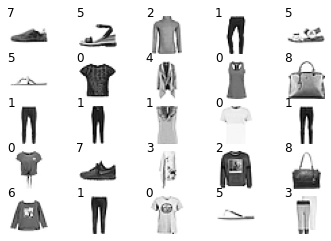

In [14]:
b=data[0][0][10:35]
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(b[i], cmap=plt.cm.Greys)
    plt.axis('off')

    image = b[i]
    image = np.array(image).reshape(1,28,28,1)
    pic= model.predict(image).argmax()
    plt.text(0.5,-0.1, pic, size=12, ha="center")

In [13]:
data[1]

<tf.Tensor: id=12245, shape=(50, 150), dtype=int64, numpy=
array([[7, 8, 4, ..., 2, 4, 0],
       [3, 2, 8, ..., 6, 8, 5],
       [4, 6, 3, ..., 5, 5, 0],
       ...,
       [2, 1, 3, ..., 2, 6, 0],
       [6, 4, 8, ..., 3, 3, 8],
       [6, 3, 4, ..., 3, 7, 8]], dtype=int64)>